In [35]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
import pylab as pl
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [66]:
# whole dataset
# df = pd.read_csv('JoinACSFCCPluto.csv')

dfm = pd.read_csv('merged_w_moran.csv')

In [105]:
#NOTE some column names truncated

dfm.columns.values

# dfm.dtypes[dfm.dtypes=='object']

array(['AFFGEOID', 'ALAND', 'AWATER', 'Area_Tot_1', 'Area_Total',
       'Area__Land', 'Average_Ho', 'BldgArea', 'Buildin_10', 'Building_1',
       'Building_2', 'Building_3', 'Building_4', 'Building_5',
       'Building_6', 'Building_7', 'Building_8', 'Building_9',
       'Building_T', 'COUNTYFP', 'Civilia_10', 'Civilia_11', 'Civilia_12',
       'Civilian_1', 'Civilian_2', 'Civilian_3', 'Civilian_4',
       'Civilian_5', 'Civilian_6', 'Civilian_7', 'Civilian_8',
       'Civilian_9', 'Civilian_P', 'ComArea', 'Employe_10', 'Employe_11',
       'Employe_12', 'Employe_13', 'Employed_1', 'Employed_2',
       'Employed_3', 'Employed_4', 'Employed_5', 'Employed_6',
       'Employed_7', 'Employed_8', 'Employed_9', 'Employed_c', 'FIPS',
       'FIPS_1', 'FactryArea', 'Families1', 'Families_', 'Families_1',
       'Families_2', 'Families_3', 'Families_4', 'Families_5',
       'Families_6', 'Families_7', 'Families_8', 'Families_9', 'GEOID',
       'GarageArea', 'Gini_Index', 'Househo_10', 'House

In [107]:
dfm.columns[-1]

'quadrant'

#### Preprocessing

In [87]:
# filter to inputs 
remove_list = ['avg_down','avg_up','max_down','max_up','num_provid','top_plat_r','Total_',
               'bscore_raw','bscore_nor','geometry_x','quadrant','LSAD','AFFGEOID']

remove_listq = ['avg_down','avg_up','max_down','max_up','num_provid','top_plat_r','Total_',
               'bscore_raw','bscore_nor','geometry_x','quadrant','LSAD','AFFGEOID']

data = dfm.drop(remove_listq,1)
data = pd.get_dummies(data=data, columns=['top_plat_t'])

#convert to array
data_ar = np.asarray(data)

In [89]:
# check for and replace NaNs/infinities, etc
# np.any(np.isnan(data_ar))
# np.all(np.isfinite(data_ar))

# convert to real numbers
# data_ar = np.nan_to_num(data_ar)

True

In [90]:
# whiten data - standard normalize - PCA uses zero-centered data
data_norm = (data_ar - data_ar.mean())*1.0/data_ar.std()

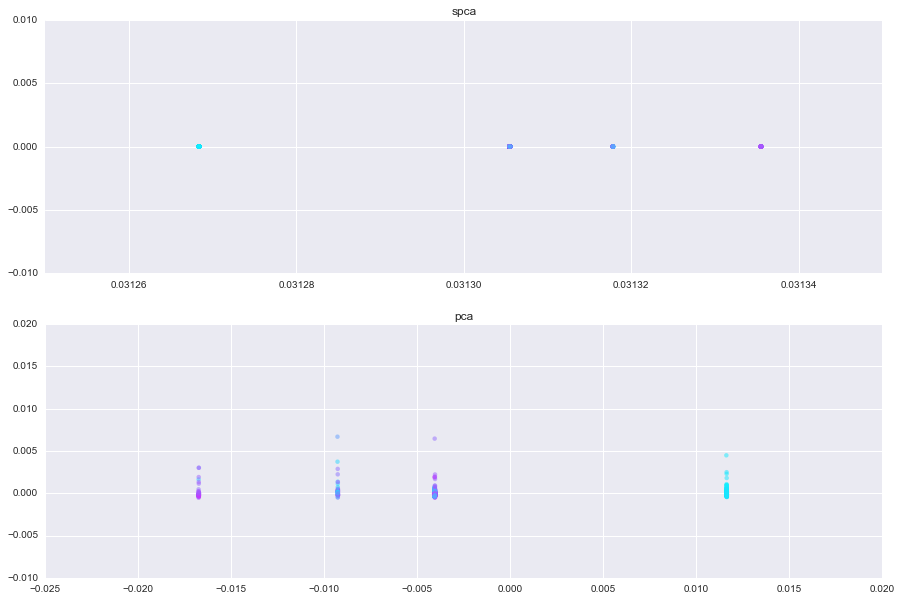

In [140]:
fig = pl.figure(figsize=(15,10))

spca = SparsePCA(n_components=2,alpha=8,verbose=False,method='lars')
X_proj = spca.fit_transform(data_norm)
pl.subplot(211)
pl.scatter(X_proj[:, 0], X_proj[:, 1], c=dfm['bscore_raw'], edgecolor='none', alpha=0.5,
            cmap=pl.cm.cool)
pl.title('spca')
pl.xlim([0.03125,0.03135])


pl.subplot(212)
pca = PCA(n_components=2)
X_proj = pca.fit_transform(data_norm)
pl.scatter(X_proj[:, 0], X_proj[:, 1], c=dfm['bscore_raw'], edgecolor='none', alpha=0.5,
            cmap=pl.cm.cool)
pl.title('pca');

In [137]:
print("\nLeading principal component:\n", spca.components_[0,:])
print("Features in leading principal component:\n",data.columns[spca.components_[0,:]!=0.0])


Leading principal component:
 [   0.            0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
  236.04576109  236.04576108    0.            0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.          236.04576109    0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.            0.            0.           

,ALAND,AWATER,Area_Tot_1,Area_Total,Area__Land,Average_Ho,BldgArea,Buildin_10,Building_1,Building_2,...,Workers_32,Workers_33,Workers_34,Workers_35,num_platfo,w_percent,top_plat_t_Cable,top_plat_t_Copper,top_plat_t_Fiber,top_plat_t_Fixed_wireless
0,104645.0,0.0,0.0,0.040356,0.040356,2.58,2638633.0,0.0,3.0,0.0,...,303.0,311.0,63.0,67.0,3.0,72.651168,0.0,0.0,1.0,0.0
1,82641.0,0.0,0.0,0.032101,0.032101,2.92,1448392.0,8.0,1.0,8.0,...,249.0,254.0,79.0,25.0,3.0,77.373096,1.0,0.0,0.0,0.0
2,184733.0,0.0,0.0,0.071326,0.071326,3.19,2565407.0,12.0,1.0,21.0,...,471.0,351.0,115.0,11.0,3.0,77.879046,0.0,0.0,1.0,0.0
3,150832.0,0.0,0.0,0.057306,0.057306,3.25,1465566.0,0.0,0.0,3.0,...,409.0,587.0,36.0,84.0,3.0,90.691417,0.0,1.0,0.0,0.0
4,212430.0,0.0,0.0,0.082020,0.082020,3.32,3185383.0,13.0,6.0,47.0,...,601.0,549.0,231.0,248.0,3.0,68.893028,0.0,1.0,0.0,0.0
